<a href="https://colab.research.google.com/github/shobhit0023/NEUROFIND/blob/main/Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

import os
import PIL
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import h5py
import cv2
from google.colab.patches import cv2_imshow
%matplotlib inline


# New Section

In [6]:

!ls '/content/drive/MyDrive/Colab Notebooks/NEUROFIND/Zip data'


brainTumorDataPublic_1533-2298.zip  brainTumorDataPublic_767-1532.zip
brainTumorDataPublic_1-766.zip	    cvind.mat
brainTumorDataPublic_2299-3064.zip  README.txt


In [7]:

!cat '/content/drive/MyDrive/Colab Notebooks/NEUROFIND/Zip data/README.txt'

This brain tumor dataset containing 3064 T1-weighted contrast-inhanced images
from 233 patients with three kinds of brain tumor: meningioma (708 slices), 
glioma (1426 slices), and pituitary tumor (930 slices). Due to the file size
limit of repository, we split the whole dataset into 4 subsets, and achive 
them in 4 .zip files with each .zip file containing 766 slices.The 5-fold
cross-validation indices are also provided.

-----
This data is organized in matlab data format (.mat file). Each file stores a struct
containing the following fields for an image:

cjdata.label: 1 for meningioma, 2 for glioma, 3 for pituitary tumor
cjdata.PID: patient ID
cjdata.image: image data
cjdata.tumorBorder: a vector storing the coordinates of discrete points on tumor border.
		For example, [x1, y1, x2, y2,...] in which x1, y1 are planar coordinates on tumor border.
		It was generated by manually delineating the tumor border. So we can use it to generate
		binary image of tumor mask.
cjdata.tumorMask: a

In [ ]:
import os

directory = '/content/drive/MyDrive/Colab Notebooks/NEUROFIND/image'

os.mkdir(directory)


FileExistsError: ignored

In [ ]:
import os

directory = '/content/drive/MyDrive/Colab Notebooks/NEUROFIND/image'

if not os.path.exists(directory):
    os.mkdir(directory)
else:
    print("Directory already exists.")


Directory already exists.


In [ ]:

!mv /content/drive/MyDrive/Colab Notebooks/NEUROFIND/Zip data/brainTumorDataPublic_1-766.zip/*.mat '/content/drive/MyDrive/Colab Notebooks/NEUROFIND/image'

mv: cannot stat '/content/drive/MyDrive/Colab': No such file or directory
mv: cannot stat 'Notebooks/NEUROFIND/Zip': No such file or directory
mv: cannot stat 'data/brainTumorDataPublic_1-766.zip/*.mat': No such file or directory


In [ ]:
!mv /content/drive/MyDrive/Colab\ Notebooks/NEUROFIND/Zip\ data/brainTumorDataPublic_1-766.zip/*.mat /content/drive/MyDrive/Colab\ Notebooks/NEUROFIND/image


mv: cannot stat '/content/drive/MyDrive/Colab Notebooks/NEUROFIND/Zip data/brainTumorDataPublic_1-766.zip/*.mat': Not a directory


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
!pip install pydrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
gauth = GoogleAuth()
drive = GoogleDrive(gauth)


In [ ]:
file_id = 'https://drive.google.com/file/d/1S0vBEC8K0t4dJONUdZsqZeX9i0lvETNs/view?usp=share_link'
zip_file = drive.CreateFile({'id': file_id})
zip_file.GetContentFile('archive.zip')
!unzip -q archive.zip

InvalidConfigError: ignored

In [9]:
import os

current_dir = os.getcwd()


In [ ]:
file_name = 'client_secrets.json'


In [ ]:
file_path = os.path.join(current_dir, file_name)


In [ ]:
import os

file_path = os.path.abspath("client_secrets.json")
print(file_path)



/content/client_secrets.json


In [ ]:
file_id = '/content/client_secrets.json'
zip_file = drive.CreateFile({'id': file_id})
zip_file.GetContentFile('archive.zip')
!unzip -q archive.zip

InvalidConfigError: ignored

In [10]:

arrays = {}
img = None

cjdata
('cjdata', <HDF5 group "/cjdata" (5 members)>)
PID <HDF5 dataset "PID": shape (6, 1), type "<u2">
image <HDF5 dataset "image": shape (512, 512), type "<i2">
label <HDF5 dataset "label": shape (1, 1), type "<f8">
tumorBorder <HDF5 dataset "tumorBorder": shape (1, 38), type "<f8">
tumorMask <HDF5 dataset "tumorMask": shape (512, 512), type "|u1">
Image shape:  (512, 512)
Label 1.0
Coords:  [267.61524501 231.37568058 277.83666062 248.10163339 289.91651543
 250.8892922  305.71324864 253.676951   318.72232305 249.9600726
 321.50998185 237.88021779 354.96188748 234.16333938 367.97096189
 227.65880218 380.9800363  210.93284936 372.61705989 195.13611615
 363.32486388 177.48094374 350.31578947 176.55172414 336.37749546
 183.98548094 317.79310345 196.06533575 305.71324864 207.21597096
 295.49183303 217.43738657 288.98729583 222.08348457 273.19056261
 223.94192377 268.54446461 228.58802178]
Mask shape:  (512, 512)


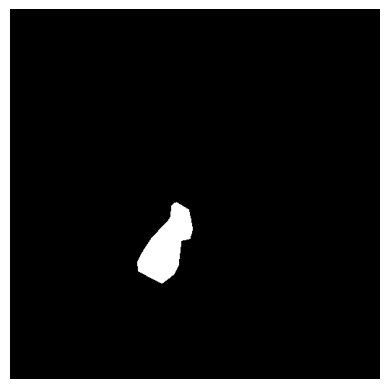

In [11]:
with h5py.File('/content/drive/MyDrive/Colab Notebooks/NEUROFIND/image data/1.mat', 'r') as f:
    for key in f.keys():
      print(key)
    for item in f.items():
      print(item)
    for key, val in f['cjdata'].items():
      print(key, val)
    img = f['cjdata']['image']
    label = f['cjdata']['label'][0][0]
    tumorBorder = f['cjdata']['tumorBorder'][0]
    mask = f['cjdata']['tumorMask']
    fig = plt.figure(2)
    img = np.array(img, dtype=np.float32)
    img = img/127.5 - 1
    mask = np.array(mask, dtype=np.float32)
    mask = mask/127.5 - 1
    plt.axis('off')
    plt.imshow(img, cmap='gray')
    print("Image shape: ", img.shape)
    print("Label", label)
    print("Coords: ", tumorBorder)
    print("Mask shape: ", mask.shape)
    fig = plt.figure(3)
    plt.axis('off')
    plt.imshow(mask, cmap='gray')

In [12]:

labels = []

3064 files successfully saved


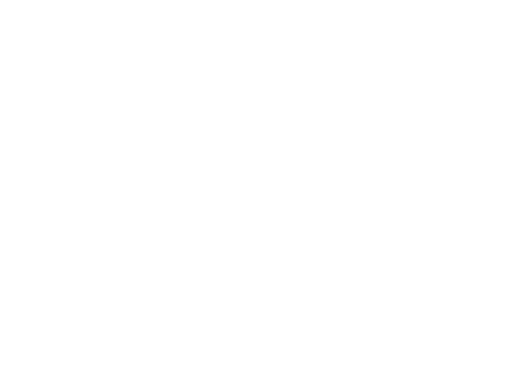

In [13]:

filename = None

for filename in range(1, 3065):
  with h5py.File('/content/drive/MyDrive/Colab Notebooks/NEUROFIND/image data/{}.mat'.format(filename), 'r') as f:
      img = f['cjdata']['image']
      label = f['cjdata']['label'][0][0]
      tumorBorder = f['cjdata']['tumorBorder'][0]
     
     
      labels.append(int(label))
      
      tumorBorder = np.array(tumorBorder, dtype=np.float32)
      img = np.array(img, dtype=np.float32)
      
      plt.axis('off')
      plt.imsave("/content/drive/MyDrive/Colab Notebooks/new_dataset/bt_imags/{}.jpg".format(filename), img, cmap='gray')
      
      
print("{} files successfully saved".format(filename))

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:

label_names = np.array(labels, dtype=np.int64)


In [16]:

label_names.shape

(3064,)

In [18]:
pickle_out = open("/content/drive/MyDrive/Colab Notebooks/new_dataset/labels.pickle","wb")                    
pickle.dump(label_names, pickle_out)
pickle_out.close() 

In [19]:

training_data = []
img = None
label = None
i = None
     

In [20]:
for i in range(1, 3065):
  img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/new_dataset/bt_imags/{}.jpg".format(i), cv2.IMREAD_GRAYSCALE)
  img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
  img = cv2.resize(img, (512, 512))
  label = label_names[i-1]
  training_data.append([img, label])

print("shape: {} label: {} | {} samples successfully preprocessed".format(img.shape, label, i))

pickle_out = open("/content/drive/MyDrive/Colab Notebooks/new_dataset/training_data.pickle","wb")                    
pickle.dump(training_data, pickle_out)
pickle_out.close()
     

shape: (512, 512, 3) label: 1 | 3064 samples successfully preprocessed
